# QUEJAS Y RECLAMOS SUPERFINANCIERA

Tomado de :  https://www.datos.gov.co/Hacienda-y-Cr-dito-P-blico/Quejas-interpuestas-por-los-consumidores-financier/xyy7-rn7p/data_preview




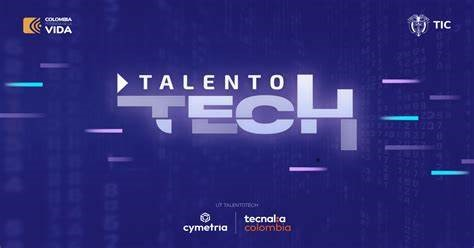

 ## PLANTEAMIENTO DEL PROBLEMA

Mediante esta información historica de la superfinanciera nos permitira verificar las quejas mas concurrentes que presentan los usuarios y asi poder retroalimentar al sector financiero  para que mejoren  la calidad del servicio financiero en Colombia.

¿Que Entidad financiera y en que Region del Pais se presentaron el mayor número de quejas y reclamos por parte de los usuarios y clientes del sistema fiananciero para realizar la respctiva retroalimentación?


## OBJETIVOS
1) Explore the Dataset 2) Preprocessing Steps 3) visualización y Conclusiones



# SET DE DATOS
La información se encuentra en un archivo CSV (data.csv) con 530689 datos y 10 columnas.
las caracteristicas de las columnas son:
1. Mes de creación: es el mes dondes se radico la queja por parte del cliente o el usuario.
2. Tipo de Entidad: se refiere si es un banco o una corporación
3. Código de entidad: es el numero que identifica el nombre del banco o coorporación.
4. Instancia recepción: que entidad del Gobierno recibio la queja.
5. Motivo: la razon que tuvo el cliente o usuario para radicar la queja.
6. Producto: Hace referencia a la clase de producto que tenia el cliente o usuario que lo llevo a radicar la queja.
7. Departamento: Se refiere en que departmento se origino la queja.
8. Municipio: Se refiere en que Municipio se origino la queja.
9. Cantidd de quejas: es el número de quejas radicadas en un tiempo definido.

# CODIGOS BANCOS

Para mayor ilustración y observando la data que unicamente trae los códigos de los diferentes bancos, realice la investigacion y proyectare el nombre de los 8 bancos mas iportantes del País para una mayor comprensión y analisis.

In [ ]:
##CARGUE DE LOS OCHO BANCOS DEL SISTEMA FINANCIERO COLOMBIANO
from tabulate import tabulate

matriz = [["00", "BanRepublica"],["01", "BanBogota"], ["02", "BanPopular"],["07", "Bancolombia"],["13", "BBVA Colombia"],["13", "BanOccidente"],["32", "BanCajaSocial"],["40", "BanAgrario"]]
print(tabulate(matriz, headers=["Código", "Banco"]))


  Código  Banco
--------  -------------
      00  BanRepublica
      01  BanBogota
      02  BanPopular
      07  Bancolombia
      13  BBVA Colombia
      13  BanOccidente
      32  BanCajaSocial
      40  BanAgrario


# CARGUE DE LIBRERIAS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import IPython.display as display


# CARGA DE DATOS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# LECTURA DE DATOS:
Nos permite montar el google drive y exportar la ruta donde se encuentra el archivo (data.csv), lo cual nos permitira recoger y filtrar la información que vamos a necesitar para realizar el estudio de esta data.


In [ ]:
ruta = '/content/data.csv'
df = pd.read_csv(ruta)
df.head()


,Año_Creacion,Mes_Creacion,Tipo_Entidad,Codigo_Entidad,Instancia_Recepcion,Motivo,Producto,Departamento,Municipio,Cantidad_quejas_recibidas
0,2023,4,1,13,Entidad vigilada,Otros motivos,Cuenta de ahorro,ATLÁNTICO,BARRANQUILLA,9
1,2023,3,1,39,Entidad vigilada,Revisión y/o liquidación de productos,Leasing habitacional,CÓRDOBA,MONTELÍBANO,1
2,2023,3,23,2,Entidad vigilada,No disponibilidad o fallas de los canales de a...,Cesantías,ANTIOQUIA,CALDAS,1
3,2023,4,13,1,Entidad vigilada,Incumplimiento de obligaciones en prestación d...,Seguro de automóviles,ANTIOQUIA,BELLO,1
4,2023,5,13,17,Entidad vigilada,Demora o no emisión de la póliza,Seguro Obligatorio de Accidentes de Tránsito (...,VALLE DEL CAUCA,BUGALAGRANDE,1


# CARACTERISTICAS GENERALES DE LA DATA:
Tiene 530689 filas, con 10 columnas y se obeserva los primeros 5 registros del set de datos. Esto nos permitira tambien clasificar de estas columnas cuales son categoricas y cuales son numericas

In [ ]:
print (df.shape)
df.head()


(530689, 10)


,Año_Creacion,Mes_Creacion,Tipo_Entidad,Codigo_Entidad,Instancia_Recepcion,Motivo,Producto,Departamento,Municipio,Cantidad_quejas_recibidas
0,2023,4,1,13,Entidad vigilada,Otros motivos,Cuenta de ahorro,ATLÁNTICO,BARRANQUILLA,9
1,2023,3,1,39,Entidad vigilada,Revisión y/o liquidación de productos,Leasing habitacional,CÓRDOBA,MONTELÍBANO,1
2,2023,3,23,2,Entidad vigilada,No disponibilidad o fallas de los canales de a...,Cesantías,ANTIOQUIA,CALDAS,1
3,2023,4,13,1,Entidad vigilada,Incumplimiento de obligaciones en prestación d...,Seguro de automóviles,ANTIOQUIA,BELLO,1
4,2023,5,13,17,Entidad vigilada,Demora o no emisión de la póliza,Seguro Obligatorio de Accidentes de Tránsito (...,VALLE DEL CAUCA,BUGALAGRANDE,1


#CLASIFICAMOS LAS VARIABLES CATEGORICAS Y NUMERICAS:
VARIABLES NUMERICAS:  Año_Creacion, Mes_Creacion, Tipo_Entidad, Codigo_Entidad, Cantidad_quejas_recibidas.


VARIABLES NUMERICAS: Instancia_Recepcion, Motivo, Producto, Departamento, Muncipio.

LIMPIEZA: Se realiza proceso de limpiza teniendo en cuenta las situaciones mas comunes, como son:

datos faltantes en algunas celdas
Columnas irrelevantes, que no corresponden al problema que deseamos resolvee.
Registros repetidos (filas)
Valores extremos (outliers) en el caso de las variables númericas debes ser muy minuciso porque la eliminación no puede ser la solución mas acertada
Errores de digitacion de datos.
Con esta depuración debemos tener una data mas integra que nos permitira analizarla con mayor profundidad.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530689 entries, 0 to 530688
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Año_Creacion               530689 non-null  int64 
 1   Mes_Creacion               530689 non-null  int64 
 2   Tipo_Entidad               530689 non-null  int64 
 3   Codigo_Entidad             530689 non-null  int64 
 4   Instancia_Recepcion        530689 non-null  object
 5   Motivo                     530689 non-null  object
 6   Producto                   530689 non-null  object
 7   Departamento               528768 non-null  object
 8   Municipio                  528768 non-null  object
 9   Cantidad_quejas_recibidas  530689 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 40.5+ MB


# DATOS FALTANTES
Cuando corrimos el código data.info(), nos podemos dar cuenta que existen unos datos faltantes ya que todas las coulumnas no tienen igual cantidad de registros, el numero total de registros debería ser 530689, pero no podemos dar cuenta que columnas como "Departamento" y Municipio tienen 528768.

# DESCRIBE
Busca las columnas númericas y nos muestra información estadistica de estas columnas y para validar que estas no tienen un unico valor nos basamos en  los resultados que de la STD, si es igual a cero esto significa que todos los valores son iguales pero como se puede observar son diferentes de cero significa que son diversos por tanto no se elimina ninguna columna.
Nos enfocaremos en la columna Cantidad_quejas_recibidas, ya que nos dara información de los percentiles, graficare un boxplot para clarificar los resultados


In [ ]:
df.describe()

,Año_Creacion,Mes_Creacion,Tipo_Entidad,Codigo_Entidad,Cantidad_quejas_recibidas
count,530689.000000,530689.000000,530689.000000,530689.000000,530689.000000
mean,2023.301947,5.450789,9.632231,25.639145,5.566937
std,0.459103,3.393697,18.356361,23.113727,88.599185
min,2023.000000,1.000000,1.000000,1.000000,1.000000
25%,2023.000000,3.000000,1.000000,7.000000,1.000000
50%,2023.000000,5.000000,1.000000,17.000000,1.000000
75%,2024.000000,8.000000,14.000000,42.000000,2.000000
max,2024.000000,12.000000,401.000000,157.000000,16771.000000


EJECUTAMOS Y ANALIZAMOS  BOXPLOT:

Esta imagen demuestra lo siguiente

MEAN 5566 quejas radicadas por clientes y usuarios

STD 88599: quejas radicadas por clientes y usuarios

MIN 1000: quejas radicadas por clientes y usuarios

MAX: 16000: quejas radicadas por clientes y usuarios


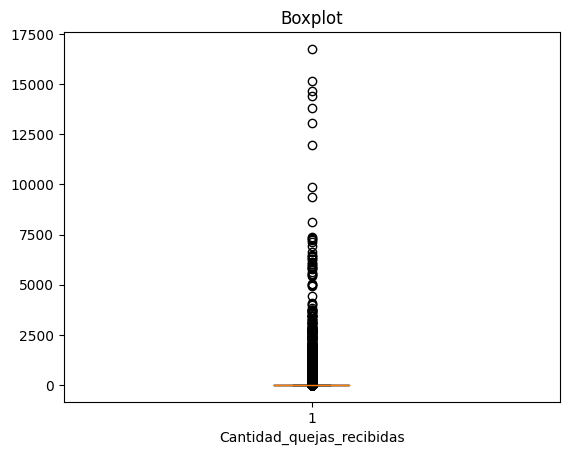

In [ ]:
# Crear un boxplot
plt.boxplot(df['Cantidad_quejas_recibidas'])

# Añadir etiquetas y título
plt.xlabel('Cantidad_quejas_recibidas')
plt.title('Boxplot')

# Mostrar el gráfico
plt.show()

# FILAS REPETIDAS:

Busca filas que aparezcana repetidas dos o mas veces y va dejar la versión original, las otras repeticiones las va eliminar.
Vamos a imprimir el tamaño que se tenia antes de eliminar estas filas y despues de haberlas eliminado.

In [ ]:
print(f"Tamaño del set antes de eliminar las filas repetidas: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"Tamaño del set despues de eliminar las filas repetidas: {df.shape}")

Tamaño del set antes de eliminar las filas repetidas: (530689, 10)
Tamaño del set despues de eliminar las filas repetidas: (530689, 10)


# VALORES NULOS
Mediante este codigo vamos a verificar si existen valores nulos para esta data

In [ ]:
#VER VALORES NULOS
df.isnull().sum()

,0
Año_Creacion,0
Mes_Creacion,0
Tipo_Entidad,0
Codigo_Entidad,0
Instancia_Recepcion,0
Motivo,0
Producto,0
Departamento,1921
Municipio,1921
Cantidad_quejas_recibidas,0


# VALORES DUPLICADOS

Mediante este codigo vamos a validar si existe valores duplicados

In [ ]:
df.duplicated().sum()

0

# OUTLIERS EN LAS VARIABLES NUMERICAS

No siempre se deben eliminar valores extremos poque va depender de la variable numerica analizada, los cuales pueden contener información relevante para el analisis de la data.
Tomamos las columnas con variables numericas y con un gráfico boxplot vamos a poder ver en cada una de las columnas que valores estan saliendo del rango normal.
No procede a eliminar columnas porque en el año de creacion aparece correcto año 2023-2024, en el mes aparece hasta el 12 y en quejas recibidas hasta 16 mil.

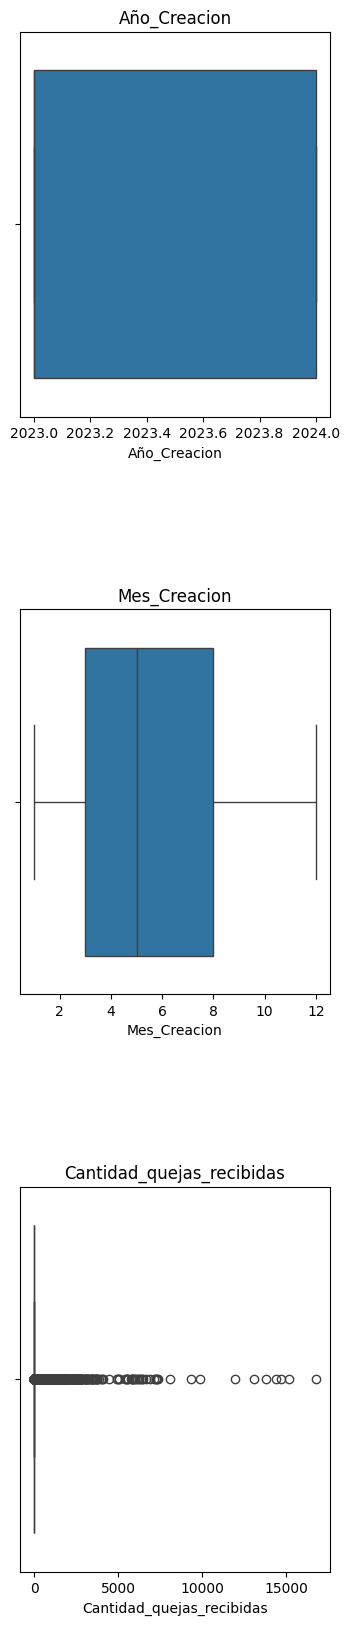

In [ ]:
cols_num = ['Año_Creacion', 'Mes_Creacion', 'Cantidad_quejas_recibidas']
fig, ax = plt.subplots(nrows=3, ncols=1,  figsize=(4,20))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
  sns.boxplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  #fig.show()
  #plt.show()

# OBSERVACIONES

Cantidad de quejas recibidas: Se aprecian valores supremamente altos, para una mejor interpretación eliminaremos registros superirores a 7500


In [ ]:
#eliminar filas con "Cantidad_quejas_recibidas" >7500
print(f"tamaño del set antes de eliminar registros de Cantidad_quejas_recibida: {df.shape}")
df = df[df['Cantidad_quejas_recibidas'] <= 7500]
print(f"tamaño del set despues de eliminar registros de Cantidad_quejas_recibida: {df.shape}")


tamaño del set antes de eliminar registros de Cantidad_quejas_recibida: (530689, 10)
tamaño del set despues de eliminar registros de Cantidad_quejas_recibida: (530679, 10)


# ERRORES TIPOGRAFICOS EN VARIABLES CATEGORICAS

En una variable categorica puede aparecer un subnivel que tiene una misma interpretación pero se esta escriendo diferente y ademas para el programa es diferente.
Para validar las tipografias graficamos ('Codigo_Entidad', 'Instancia_Recepcion', 'Producto') y verificar que no existen errores tipograficos para su respectiva corrección.


<ipython-input-44-ec31b6168106>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=60)
<ipython-input-44-ec31b6168106>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=60)
<ipython-input-44-ec31b6168106>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=60)


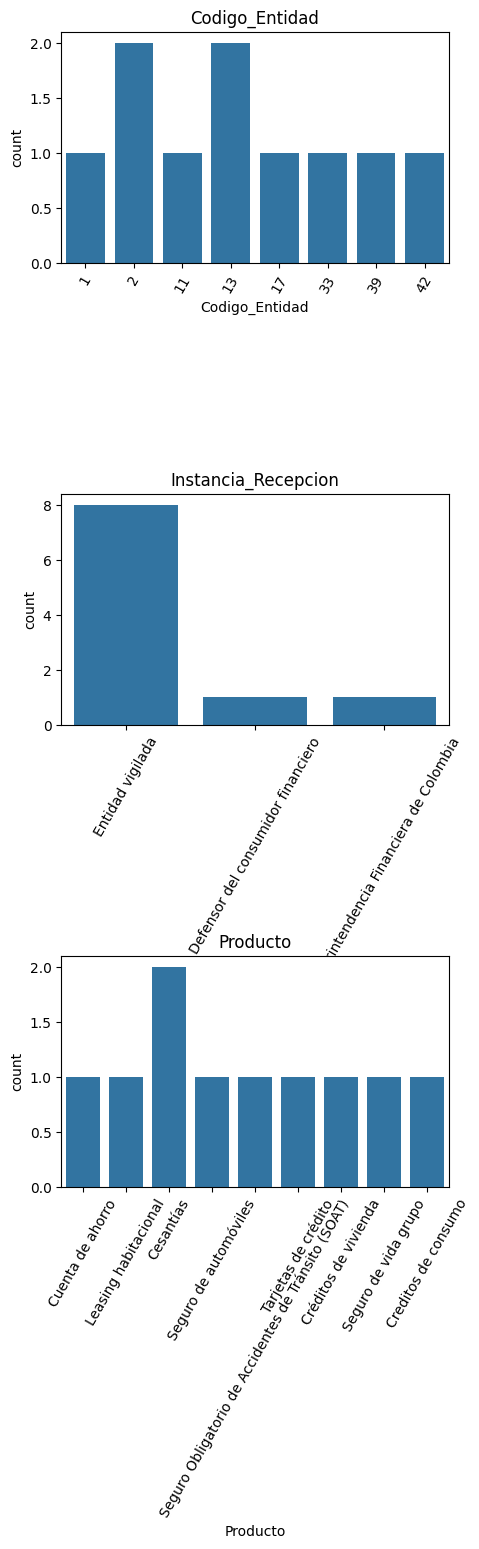

In [ ]:
# Graficar los subniveles de cada variable categorica
cols_cat = ['Codigo_Entidad', 'Instancia_Recepcion', 'Producto']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5,15))

fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=df[:10], ax=ax[i])

  ax[i].set_title(col)

  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=60)
  fig.show()


# REMPLAZO:
Para una mejor compresión de la data remplazamos los códigos de banco por el nombre y así poder efectuar un analisis mas objetivo.

In [ ]:
#data["Codigo_Entidad"] = data["Codigo_Entidad"].str.replace #( regex=False)
#print(data['Codigo_Entidad'].unique())
# Convert the 'Codigo_Entidad' column to string type before using .str.replace

df["Codigo_Entidad"] = df["Codigo_Entidad"].astype(str)

df["Codigo_Entidad"] = df["Codigo_Entidad"].str.replace("7"," Bancolombia", regex=False)

df["Codigo_Entidad"] = df["Codigo_Entidad"].str.replace("0", "Banrepublica", regex=False)

df["Codigo_Entidad"] = df["Codigo_Entidad"].str.replace("1", "BanBogota", regex=False)

df["Codigo_Entidad"] = df["Codigo_Entidad"].str.replace("2", "BanPopular", regex=False)

df["Codigo_Entidad"] = df["Codigo_Entidad"].str.replace("6", "BanItau", regex=False)

df["Codigo_Entidad"] = df["Codigo_Entidad"].str.replace("9", "CityBank", regex=False)

df["Codigo_Entidad"] = df["Codigo_Entidad"].str.replace("12", "BanSudameris", regex=False)

df["Codigo_Entidad"] = df["Codigo_Entidad"].str.replace("13", "BbvaColombia", regex=False)

df["Codigo_Entidad"] = df["Codigo_Entidad"].str.replace("33", "Bancontactar", regex=False)

print(df['Codigo_Entidad'].unique())



['BanBogota3' '3CityBank' 'BanPopular' 'BanBogota' 'BanBogota Bancolombia'
 'Bancontactar' '4BanPopular' 'BanBogotaBanBogota' 'BanBogota4' '8'
 '3BanBogota' 'BanPopularCityBank' '43' 'BanPopular3' 'BanItau'
 'BanPopularBanBogota' 'BanItau3' ' Bancolombia' '3BanPopular' '5' '3'
 '53' '54' '4CityBank' '5CityBank' '4' 'BanBogotaBanPopular' 'BanPopular5'
 'BanBogota8' 'BanPopularBanPopular' 'BanBogotaBanPopularBanBogota'
 '5BanItau' 'BanBogotaBanPopularBanPopular' 'BanItauBanrepublica'
 '3Banrepublica' 'BanItauBanPopular' 'BanPopularBanItau' '5BanBogota' '44'
 'CityBank' 'BanBogotaBanPopular4' '4BanBogota' 'BanItau Bancolombia'
 'BanPopular Bancolombia' '55' '5 Bancolombia' 'BanPopularBanrepublica'
 '58' 'BanBogotaBanItau' 'BanBogotaCityBank' 'BanPopular4'
 'BanBogotaBanBogota Bancolombia' 'BanBogotaBanrepublica' '5BanPopular'
 'BanItau5' 'BanBogotaBanBogota8' '4BanItau' 'BanBogotaBanrepublica8'
 '3 Bancolombia' 'CityBankBanPopular' 'BanBogota3BanItau'
 ' BancolombiaBanItau' 'BanPopular8' 

In [ ]:
print(df.Codigo_Entidad)

0         13
1         39
2          2
3          1
4         17
          ..
530684    42
530685    39
530686    42
530687    39
530688    39
Name: Codigo_Entidad, Length: 530689, dtype: int64


<ipython-input-55-7ff08478785b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


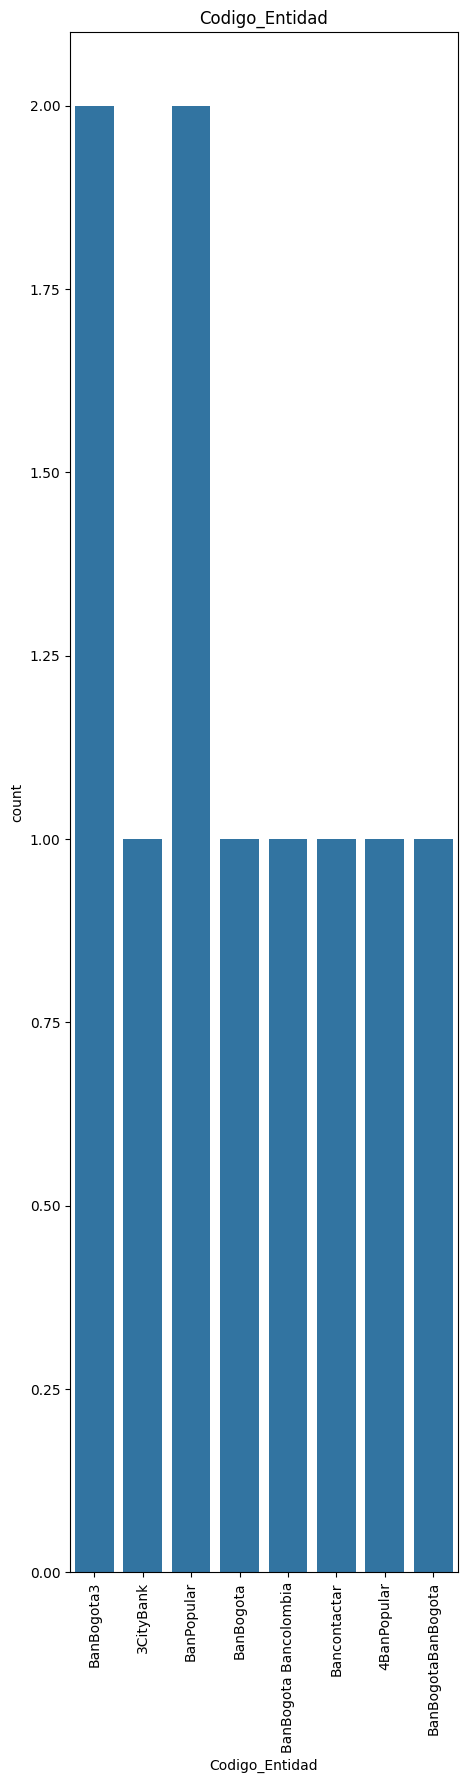

In [ ]:
cols_cat = ['Codigo_Entidad',]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,20))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=df[:10], ax=ax)
  ax.set_title(col)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
  fig.show()





# ORDENAMIENTO DATA:
Con este código pretendemos que en la data nos aparezca lo 10 primeros bancos, como podemos obervar Bancolombia registra el mayor numero de quejas en el año 2023 y 2024

In [ ]:
df_ordenado = df.sort_values(by='Cantidad_quejas_recibidas', ascending=False)
df_ordenado[:10]

,Año_Creacion,Mes_Creacion,Tipo_Entidad,Codigo_Entidad,Instancia_Recepcion,Motivo,Producto,Departamento,Municipio,Cantidad_quejas_recibidas
388785,2023,10,1,Bancolombia,Entidad vigilada,No disponibilidad o fallas de los canales de a...,Depósitos de bajo monto (Capítulo I del Título...,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",7392
459236,2024,5,1,Bancolombia,Entidad vigilada,Cobro por operaciones fallidas en cajeros elec...,Cuenta de ahorro,ANTIOQUIA,MEDELLÍN,7346
495359,2024,2,1,Bancolombia,Entidad vigilada,Cobro por operaciones fallidas en cajeros elec...,Cuenta de ahorro,ANTIOQUIA,MEDELLÍN,7276
132604,2023,11,1,Bancolombia,Entidad vigilada,Cobro por operaciones fallidas en cajeros elec...,Cuenta de ahorro,ANTIOQUIA,MEDELLÍN,7245
498800,2024,4,1,Bancolombia,Entidad vigilada,Cobro por operaciones fallidas en cajeros elec...,Cuenta de ahorro,ANTIOQUIA,MEDELLÍN,7132
373614,2023,12,1,Bancolombia,Entidad vigilada,Cobro por operaciones fallidas en cajeros elec...,Cuenta de ahorro,ANTIOQUIA,MEDELLÍN,6905
395269,2023,10,1,Bancolombia,Entidad vigilada,Cobro por operaciones fallidas en cajeros elec...,Cuenta de ahorro,ANTIOQUIA,MEDELLÍN,6650
407383,2024,3,1,Bancolombia,Entidad vigilada,Cobro por operaciones fallidas en cajeros elec...,Cuenta de ahorro,ANTIOQUIA,MEDELLÍN,6491
376874,2024,1,1,Bancolombia,Entidad vigilada,Transacción no reconocida,Tarjetas de crédito,ANTIOQUIA,MEDELLÍN,6439
453819,2024,5,1,Bancolombia,Entidad vigilada,Dificultad o imposibilidad para realizar trans...,Depósitos de bajo monto (Capítulo I del Título...,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",6366


#MOTIVO
Este filtro me permit observar los 10 primeros motivos por los cuales los clientes y usuarios radicaron queja ante la entidad que regula a las entidades fianancieras. El motivo de queja que mas se repite es vinculación no autorizada y el medio por donde radicaron es Entidad Vigilada.


In [ ]:
df_ordenado = df.sort_values(by='Motivo', ascending=False)
df_ordenado[:10]




,Año_Creacion,Mes_Creacion,Tipo_Entidad,Codigo_Entidad,Instancia_Recepcion,Motivo,Producto,Departamento,Municipio,Cantidad_quejas_recibidas
354231,2024,1,14,13,Entidad vigilada,Vinculación no autorizada,Seguro de accidentes personales,CUNDINAMARCA,ZIPAQUIRÁ,2
50044,2023,3,13,27,Entidad vigilada,Vinculación no autorizada,Seguro de desempleo,ANTIOQUIA,MEDELLÍN,1
207072,2023,7,14,32,Entidad vigilada,Vinculación no autorizada,Seguro de desempleo,NORTE DE SANTANDER,CUCUTILLA,2
427705,2024,3,13,41,Entidad vigilada,Vinculación no autorizada,Seguro de automóviles,TOLIMA,MELGAR,2
427732,2024,4,14,13,Entidad vigilada,Vinculación no autorizada,Seguro de accidentes personales,CAUCA,POPAYÁN,3
427766,2024,3,13,25,Entidad vigilada,Vinculación no autorizada,Seguro de sustracción,LA GUAJIRA,RIOHACHA,1
50214,2023,1,14,11,Entidad vigilada,Vinculación no autorizada,Seguro de vida individual,CASANARE,SABANALARGA,1
207055,2023,7,14,32,Entidad vigilada,Vinculación no autorizada,Seguro de accidentes personales,NORTE DE SANTANDER,CUCUTILLA,17
427784,2024,5,13,33,Entidad vigilada,Vinculación no autorizada,Seguro de vida grupo,RISARALDA,LA VIRGINIA,1
427797,2024,2,14,32,Entidad vigilada,Vinculación no autorizada,Seguro de vida grupo,TOLIMA,IBAGUÉ,1


# FILTROS

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df
df.Cantidad_quejas_recibidas
df["Cantidad_quejas_recibidas"]

,Cantidad_quejas_recibidas
0,9
1,1
2,1
3,1
4,1
...,...
530684,7
530685,2
530686,3
530687,3


In [ ]:
df['Cantidad_quejas_recibidas'].describe()


,Cantidad_quejas_recibidas
count,530689.000000
mean,5.566937
std,88.599185
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,16771.000000


# GRAFICOS DE BIGOTES;
Cómo mencionamos anteriormente para una mejor graficación bajamos el número de registros a 7500, en esta gráfica podemos analizar que el mayor numero de quejas se encuentra entre los rango de 1000 a 3000

<Axes: >

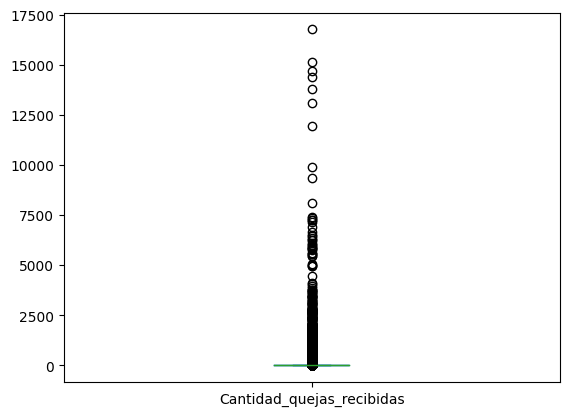

In [ ]:
df.Cantidad_quejas_recibidas.plot.box()

# DIAGRMA DE BIGOTES MES DE CREACION
Se destaca lo siguiente:

Minimo = 1 (Primer mes de año)

Maximo = 12 (último mes de año)

Mediana = 5 (mes 5 del año)

Rango = 12-1 = (mes 11 del año)

IQR = 8-5 = 3 = (mes 3 del año)


<Axes: >

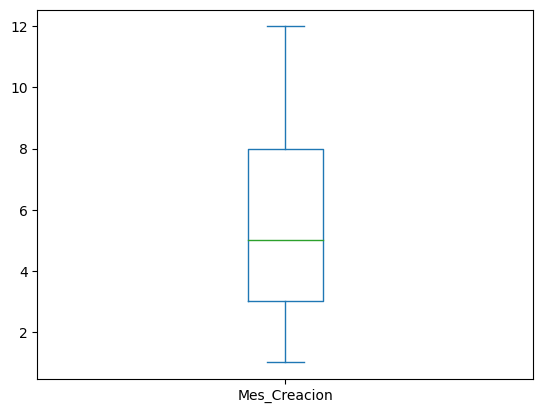

In [ ]:
df.Mes_Creacion.plot.box()

# Cantidad de quejas recibidas Vs Departamento y Entidad de que recibio
En esta gráfica se destaca que la Entidad que mas recibio quejas o reclamos fue Entidad vigilada radicadas en el Valle del Cauca con un promedio de 2 mil.

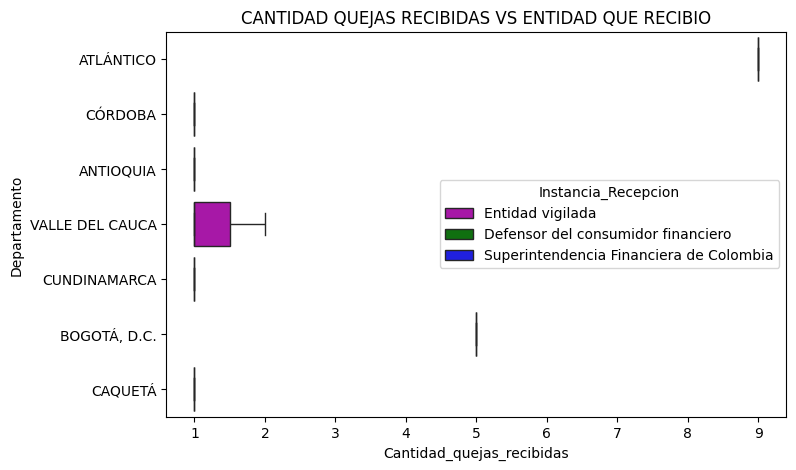

In [ ]:
#GRAFICAS DE BIGOTES
plt.figure(figsize=(8,5))
plt.title("CANTIDAD QUEJAS RECIBIDAS VS ENTIDAD QUE RECIBIO")
sns.boxplot(data=df[:10], x="Cantidad_quejas_recibidas", y="Departamento", hue="Instancia_Recepcion", palette=["m", "g", "b"])
plt.show()


# DIAGRA DE CAJAS
En el siguientes gráfico, quejas recibidas vs motivo, podemos obervar que   "otros motivos" es la queja mas recurrente radicada por los usuarios y clientes del sistema financiero con un promedio de 9 mil, y los demas motivos con un promedio de mil quejas.

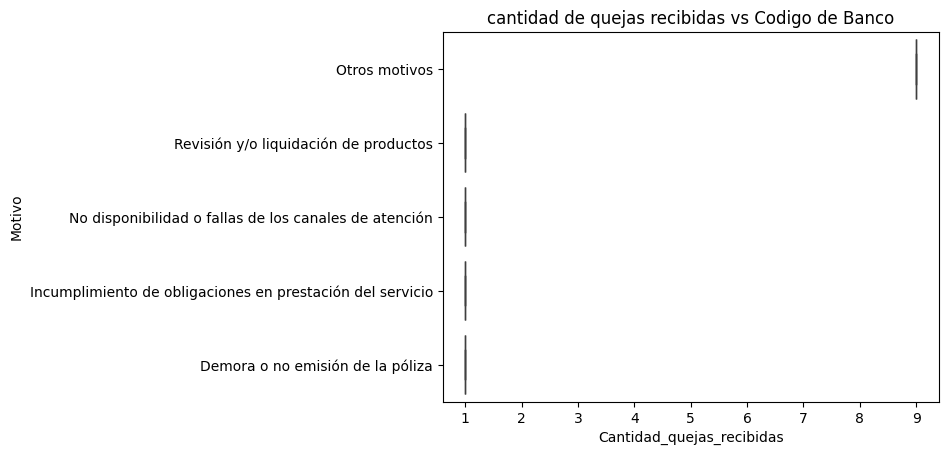

In [ ]:
sns.boxplot(data=df[:5], x="Cantidad_quejas_recibidas", y="Motivo")
plt.title("cantidad de quejas recibidas vs Codigo de Banco")
plt.show()


# Cantidad de quejas vs Municipio.
En este diagrama destacamos que la ciudad con mas quejas radicadas fue Barranquilla con un proedio de 9 mil quejas y las otras ciudades con un promedio de  mil quejas.

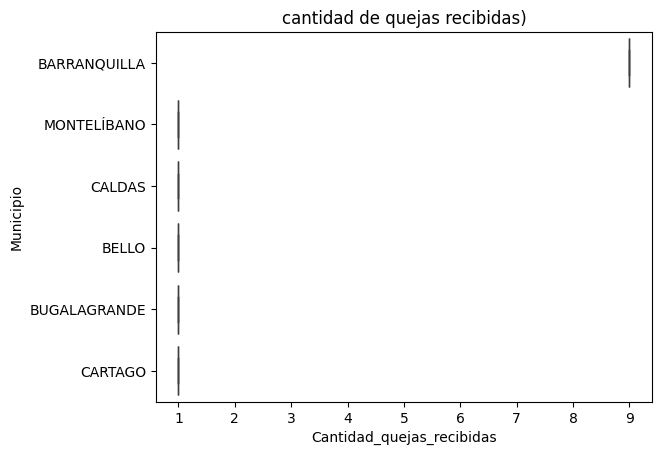

In [ ]:
sns.boxplot(data=df[:5], x="Cantidad_quejas_recibidas", y="Municipio")
plt.title("cantidad de quejas recibidas)")
plt.show()

# Cantidad de quejas vs Departamento.
En este diagrama destacamos que el Departamento con mas quejas radicadas fue Atlantico con un proedio de 9 mil quejas y las otras ciudades con un promedio de mil quejas.

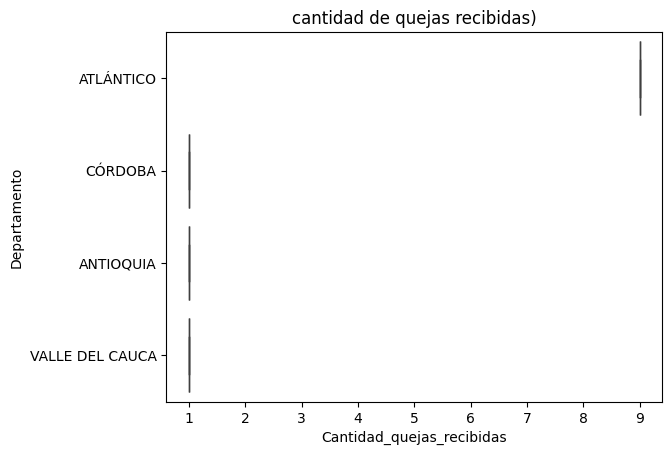

In [ ]:
sns.boxplot(data=df[:5], x="Cantidad_quejas_recibidas", y="Departamento")
plt.title("cantidad de quejas recibidas)")
plt.show()

# Cantidad de quejas vs Producto.
En este diagrama destacamos que el producto con mas quejas radicadas fue cuenta de ahorro con un proedio de 9 mil quejas y los otros productos  con un promedio de mil quejas.

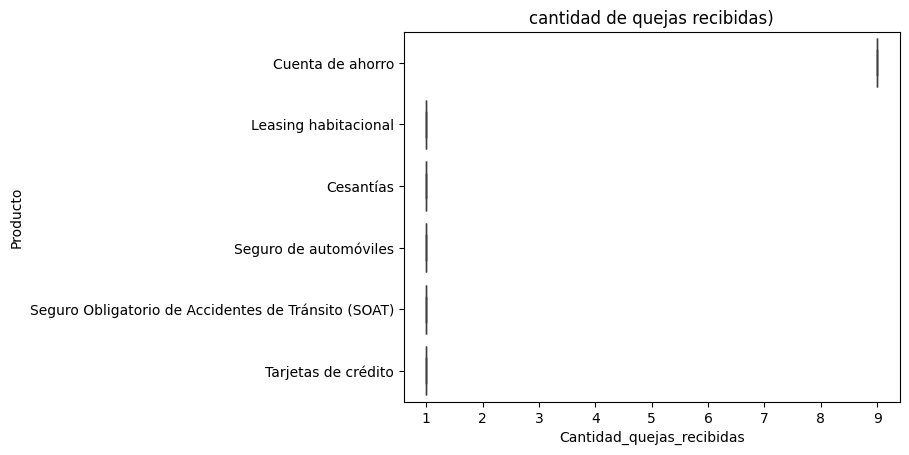

In [ ]:
sns.boxplot(data=df[:5], x="Cantidad_quejas_recibidas", y="Producto")
plt.title("cantidad de quejas recibidas)")
plt.show()



# Cantidad de quejas recibidas vs Código Banco

En este diagrama destacamos que la Entidad Bancaria que mas recibio quejas o reclamos fue Banbogota con un promedio de 9 mil quejas y las otras Entidades con un promedio de mil quejas.


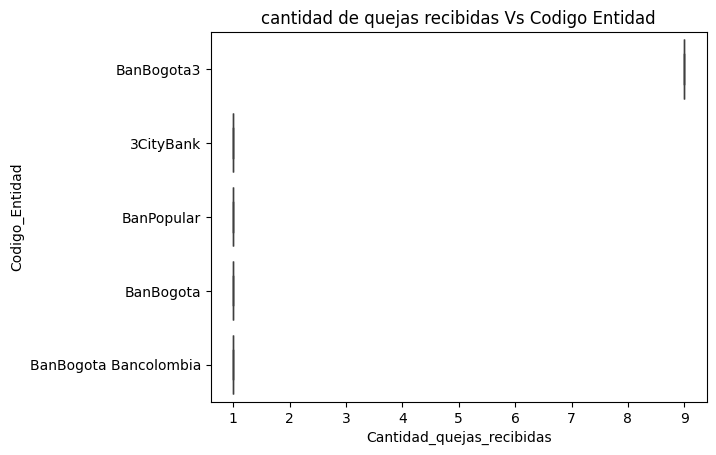

In [ ]:
sns.boxplot(data=df[:5], x="Cantidad_quejas_recibidas", y="Codigo_Entidad")
plt.title("cantidad de quejas recibidas Vs Codigo Entidad")
plt.show()

# ***CONCLUSIONES:::***

1.	El número de registros a 7500, en esta gráfica podemos analizar que el mayor número de quejas se encuentra entre los rango de 1000 a 3000
2.	Mínimo = 1 (Primer mes de año, Máximo = 12 (último mes de año, Mediana = 5 (mes 5 del año, Rango = 12-1 = (mes 11 del año, IQR = 8-5 = 3 = (mes 3 del año.
3.	La Entidad que más recibió quejas o reclamos fue Entidad vigilada radicadas en el Valle del Cauca con un promedio de 2 mil.
4.	podemos observar que   "otros motivos" es la queja mas recurrente radicada por los usuarios y clientes del sistema financiero con un promedio de 9 mil, y los demás motivos con un promedio de mil quejas.
5.	la ciudad con más quejas radicadas fue Barranquilla con un promedio de 9 mil quejas y las otras ciudades con un promedio de mil quejas.
6.	l Departamento con más quejas radicadas fue Atlántico con un promedio de 9 mil quejas y las otras ciudades con un promedio de mil quejas.
7.	Que el producto con más quejas radicadas fue cuenta de ahorro con un promedio de 9 mil quejas y los otros productos con un promedio de mil quejas.
8.	 Entidad Bancaria que más recibió quejas o reclamos fue Banbogota con un promedio de 9 mil quejas y las otras Entidades con un promedio de mil quejas.

Mensaje: las Entidades que vigilan al sistema financiero deben enfocarse en el Departamento del Atlántico, específicamente en la ciudad de Barranquilla y en el Banco de Bogotá ya que se originaron mas de 9 mil quejas o reclamos radicados por clientes y usuarios.






# ***PRESENTACION ALUMNO:::***
Nombre: Carlos Orlando Arciniegas Cortes

Contacto: 3175935649

Correo: carlosarciniegas693@gmail.com

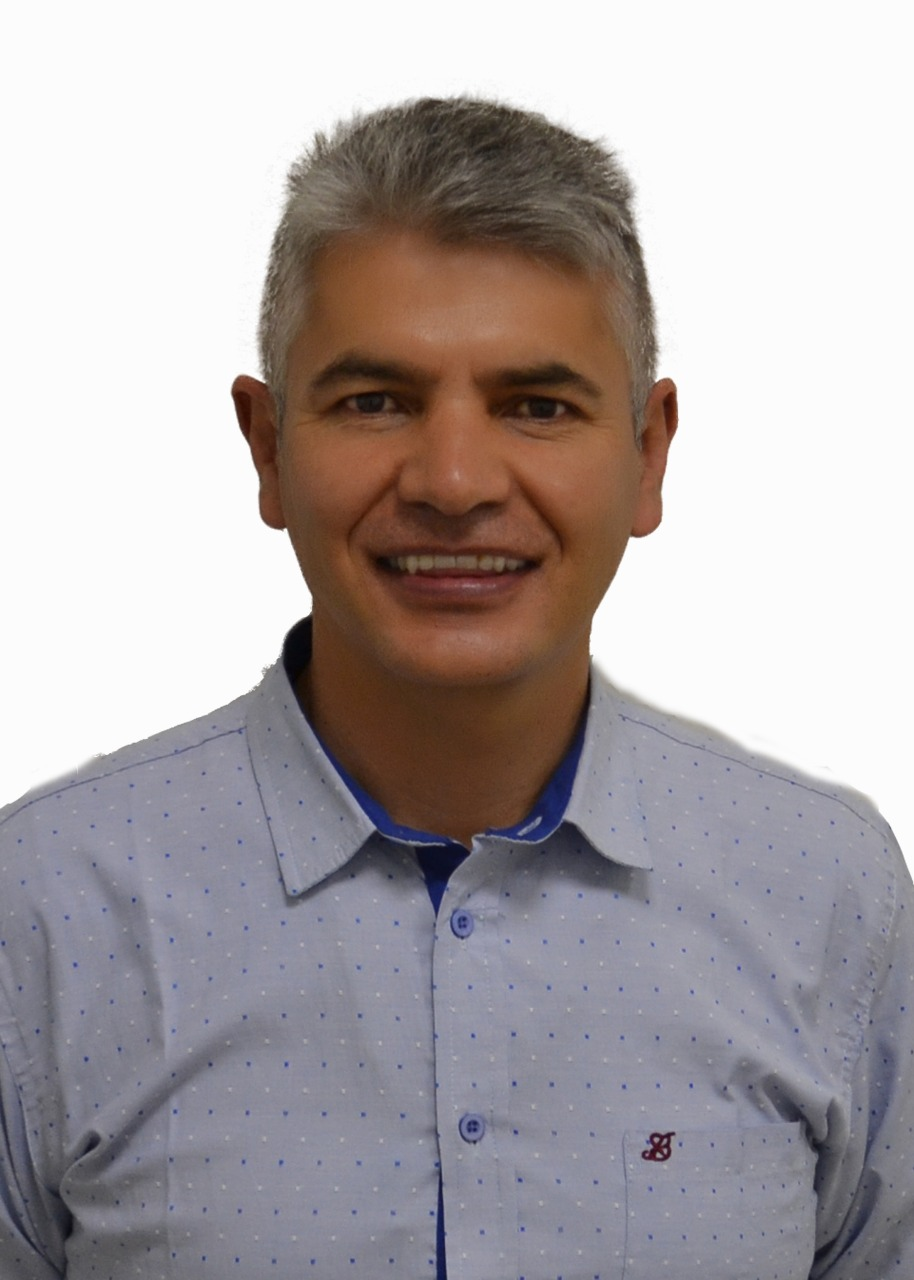

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
testImg = cv2.imread('/content/FOTO_CARLOS.jpg')
cv2_imshow(testImg)

